## Text Mining
- 비정형 텍스트 데이터에서 의미를 추출하는 작업
- 자연어처리 기술을 접목해서 최근에는 많이 활용되고 있다
    - (자연어처리 : 사람의 언어를 컴퓨터가 이해할 수 있도록 연구하는 학문)

## Text Mining Process
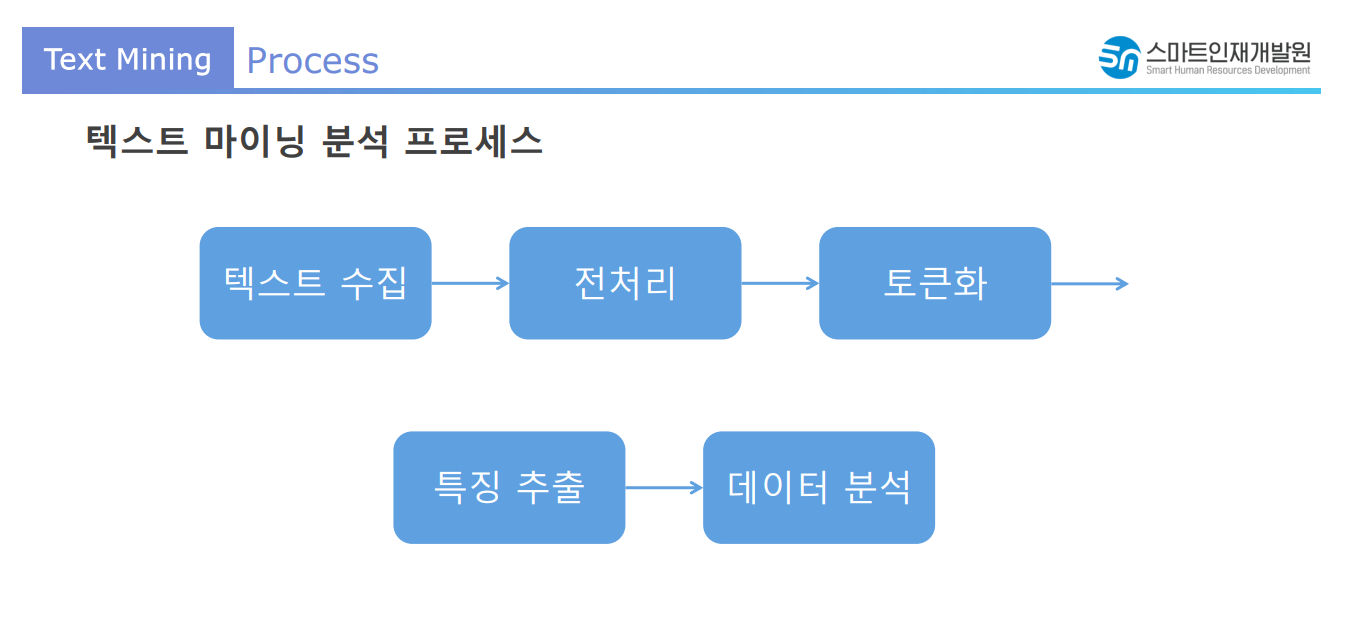

1. 전처리
    - 오타, 띄어쓰기 교정
    - 불필요한 단어제거(문장부호, 이모지, 불용어)
    - 형태소 분석(품사를 기준으로 명사, 형용사, 동사 등 ... 분리, 어근추출)
    - 불용어 처리
    - 띄어쓰기 교정
    - 이모지 제거

## 텍스트마이닝에서 활용할 분석종류
1. 단어빈도 분석
2. 감성분석 : 텍스트에서 사람의 감정/기분/의견/태도 등을 분석하는 작업
3. 연관성(유사도)분석 : text끼리 연관성이나 유사도를 비교하는 작업

## 1.단어 빈도 분석
- dataset : https://github.com/smilegate-ai/korean_unsmile_dataset

#### 데이터 수집 및 로딩
- 스마일게이트에서 실제 댓글을 모아서 정제한 데이터셋을 활용

In [330]:
# 현재 작업 디렉토리 및 폴더확인
import os
print(os.getcwd()) # 현재 작업폴더를 확인

# 작업디렉토리 내부 폴더 및 파일 확인
print(os.listdir(r'c:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML')) # r로우스트링 : 글자그대로 인식
print(os.listdir(os.getcwd()))

c:\Users\chxss\OneDrive\Desktop\AiSchool\python\ML
['data', 'ex00_머신러닝_복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝_기초.ipynb', 'ex05_쁘띠프로젝트.ipynb', '한국어 혐오 단어 100.png']
['data', 'ex00_머신러닝_복습.ipynb', 'ex01_선형회귀(이론).ipynb', 'ex02_선형회귀(실습).ipynb', 'ex03_선형분류-직원이직예측.ipynb', 'ex04_텍스트마이닝_기초.ipynb', 'ex05_쁘띠프로젝트.ipynb', '한국어 혐오 단어 100.png']


In [331]:
import pandas as pd

In [332]:
# 훈련용, 평가용 데이터 로딩
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter="\t") # 구분자
test = pd.read_csv("./data/unsmile_train_v1.0.tsv", # 파일경로
                    delimiter='\t') # 구분자

In [333]:
# 데이터 확인
display(train.head(10))
display(test.head(10))

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
5,고향가서 피방가면 동네 부럴 친구들이랑은 뭐 거르는 거 없이 이야기하니까 막 말하게...,0,0,0,0,0,0,0,0,0,1,0
6,예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...,0,0,0,1,0,1,1,1,0,0,0
7,나이쳐먹고 피시방가는 놈들은 대가리에 똥만찬 놈들임,0,0,0,0,0,0,0,0,1,0,0
8,출산청같은 소리하네. 우리나라 계집들 다 의무적으로 군대보내면 해결될 일이다. 정신...,1,0,0,0,0,0,0,0,0,0,0
9,재능 ㅂㅅㅌㅊ노 ㅋㅋㅋㅋㅋ나도 합성배우고싶다이기,0,0,0,0,0,0,0,0,0,1,0


In [334]:
# 결측치
display(train.info())
display(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


None

#### 전체 데이터에서 단어들의 빈도를 측정해서 확인해보자

In [335]:
text_train = train['문장']
text_train

0                                   일안하는 시간은 쉬고싶어서 그런게 아닐까
1        아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...
2        루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o  doin 진짜 띵...
3        홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...
4        아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...
                               ...                        
15000                                            께롱께롱께롱!!!
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
15002                             말레이시아랑 인도네시아 여자 존나 못생겼던데
15003                                링크도 안박고 가서 글 쓰자고 선동하네
15004    멸치가 틀딱 짜증나서 트러블나면 조직적으로 좀스럽게 보복함ex: 수건찜유도탄, 틀한...
Name: 문장, Length: 15005, dtype: object

In [336]:
# !pip install nltk==3.8.1

In [337]:
# 띄어쓰기 중심으로 토큰화 : nltk 패키지 활용
from nltk import word_tokenize # 토큰화를 도와주는 함수
import nltk
nltk.download("punkt") # 문장부호 정보를 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chxss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [338]:
word_tokenize(text_train.iloc[0])

['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까']

In [339]:
# 반복 프로세스의 정도를 시각화하는 도구
from tqdm import tqdm

In [340]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(text_train) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

100%|██████████| 15005/15005 [00:06<00:00, 2465.57it/s]


In [341]:
words[:10]

['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까', '아동성범죄와', '페도버는', '기록바', '끊어져', '영원히']

In [342]:
# 단어빈도 세기
from collections import Counter

In [343]:
counter = Counter(words) # 같은 단어의 갯수를 세준다

In [344]:
words_most_100 = counter.most_common(100)
words_most_100

[('?', 3815),
 ('.', 3416),
 ('!', 2066),
 (',', 1174),
 ('..', 979),
 ('...', 905),
 ('다', 667),
 ('진짜', 543),
 ('왜', 540),
 ('ㅋㅋ', 435),
 ('존나', 376),
 ('그냥', 372),
 ('더', 368),
 ('ㅋㅋㅋ', 363),
 ('>', 296),
 (';', 271),
 ('좀', 265),
 ('이', 254),
 ('시발', 244),
 ('씨발', 244),
 ('그', 240),
 ('ㅋㅋㅋㅋ', 238),
 ('저', 238),
 ('근데', 229),
 ('....', 201),
 ('안', 179),
 ('난', 176),
 ('하는', 174),
 ('새끼들', 174),
 ('이기야', 171),
 ('저런', 169),
 ('수', 169),
 ('무슨', 166),
 ('또', 165),
 (')', 161),
 ('아니라', 154),
 ('하고', 152),
 ('전라도', 152),
 ('뭐', 150),
 ('내가', 149),
 ('(', 147),
 ('ㄹㅇ', 147),
 ('있는', 141),
 ('ㅋ', 141),
 ('너무', 139),
 ('이런', 137),
 ('ㅋㅋㅋㅋㅋ', 135),
 ('잘', 135),
 ('여자', 134),
 ('아', 133),
 ('보면', 124),
 ('걍', 123),
 ('많이', 120),
 ('지금', 119),
 ('역시', 119),
 ('제발', 119),
 ('나도', 117),
 ('거', 116),
 ('어떻게', 115),
 ('같은', 115),
 ('와', 115),
 ('없다', 115),
 ('하면', 112),
 ('저거', 111),
 (':', 109),
 ('이제', 106),
 ('이기', 106),
 ('아니냐', 106),
 ('얼마나', 105),
 ('그럼', 105),
 ('ㅋㅋㅋㅋㅋㅋ', 105),
 ('저렇게', 

In [345]:
# wordcloud설치
# !pip install wordcloud

In [346]:
from wordcloud import WordCloud

In [347]:
# 객체생성
wc = WordCloud(background_color='white', # 배경색 설정
                random_state=821, # 난수 seed 고정
                font_path = r'C:\Windows\Fonts\malgun.ttf')

In [348]:
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_100))

In [349]:
# 시각화
import matplotlib.pyplot as plt
plt.rc('font',family='Malgun Gothic')

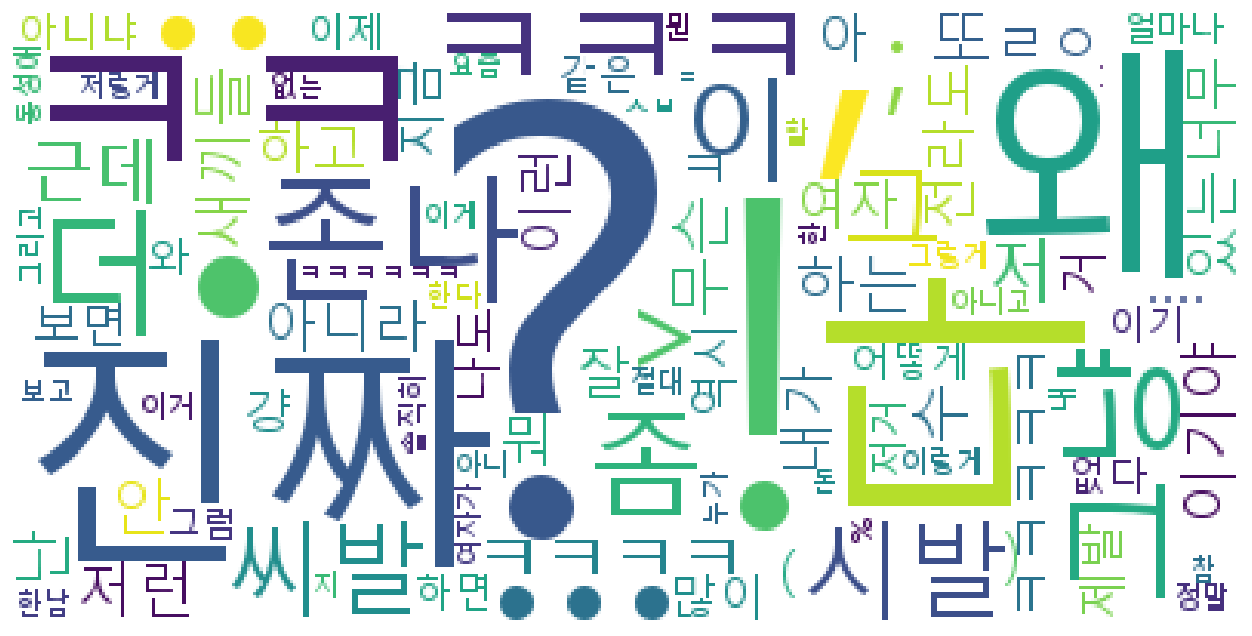

In [350]:
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.savefig("./한국어 혐오 단어 100.png") # 이미지 파일로 저장
plt.show() # 시각화 결과 보여주기

#### clean을 제외한 9가지 혐오표현중에서 한 가지를 골라 워드클라우드를 그려보자.

In [351]:
# 불리언 색인 방법
지역_혐오_text = train[train['지역']==1]['문장']
지역_혐오_text

6        예수 십새끼 개새끼 창녀아들 애비실종 가정교육 못받은 무뇌충 허언증 정신병자 사기꾼...
25                                    홍어무침 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
28                                            홍들 피들 폭들 ㅎㅎㅎ
35                                                 이새끼 전라도
37                                            진짜 전라도 존나 싫다
                               ...                        
14956                                               경상도새끼네
14975    7시말은 왜이렇게 듣기가 싫냐. 식당 같은데 가서도 전라도 말 들리면 신경 엄청 곤...
14979                      왜 재밌겠는데 뭘 섬라도 쪽 꿀잼뉴스 공중제비하고 보겠네
14998                                 전라디언은 뇌구조가 다르게 태어난당께
15001                                갱상도가아니라 홍어지 개좃같은 홍어년들
Name: 문장, Length: 1052, dtype: object

In [352]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(지역_혐오_text) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

100%|██████████| 1052/1052 [00:00<00:00, 13683.45it/s]


In [353]:
len(words)

9735

In [354]:
counter = Counter(words) # 같은 단어의 갯수를 세준다
words_most_30 = counter.most_common(30)

In [355]:
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_30))

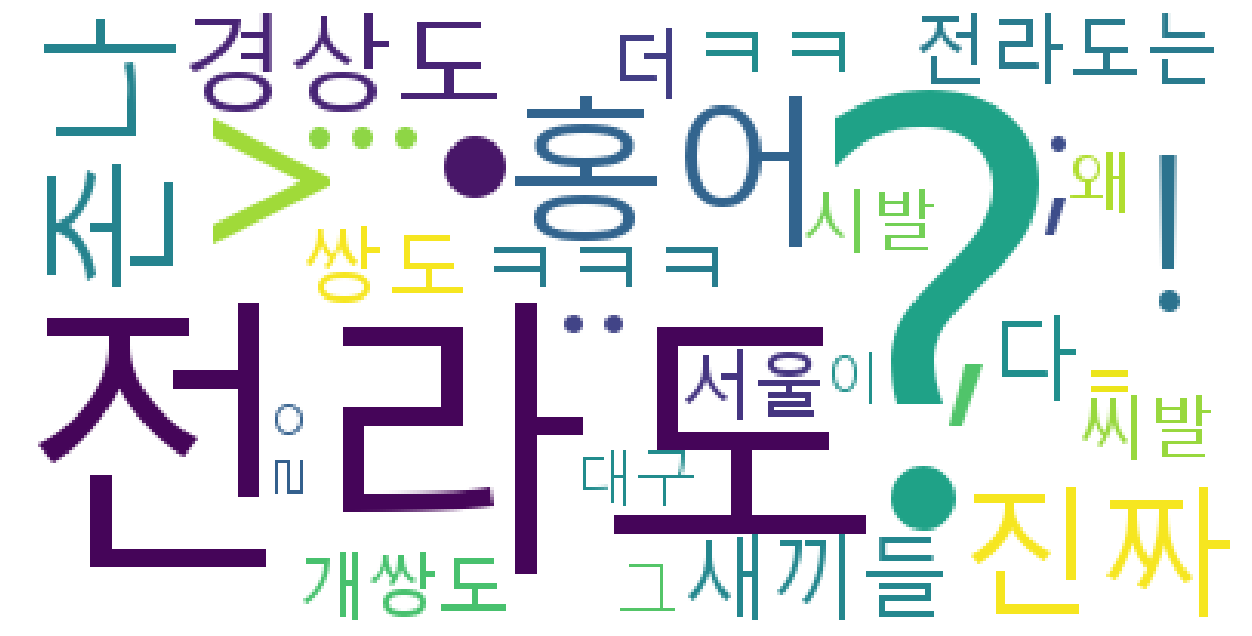

In [356]:
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

#### 전처리 : 텍스트데이터 클렌징
- 문장부호 제거
- 특정글자가 반복적으로 나타나는 단어토큰 제거 (ex : ㅋㅋ, ㅋㅋㅋ, ㅋㅋㅋㅋ)
- 한글자 단어 제거

##### 정규표현식(Regular Expression)
- 특정한 패턴(규칙)을 가진 문자열의 집합을 표현하는 언어
- 핸드폰 번호, 이메일 처럼 패턴이 있는 문자열의 검색과 치환을 위해 대부분의 프로그래밍 언어에서 지원하고 있다.
- https://wikidocs.net/21703

In [357]:
import re # 정규표현식을 사용할 수 있는 모듈 로딩

In [358]:
# 핸드폰번호 검출예시
# 1. 패턴생성
p = re.compile("010-?[0-9]{4}-?\\d{4}")
# 2. 검출
p.search('안녕하세요 저희 가게는 여기로 연락주세요. 핸드폰 번호는 010-1234-5678입니다.')

<re.Match object; span=(32, 45), match='010-1234-5678'>

In [359]:
p.search('전화번호 : 0101234-5678')

<re.Match object; span=(7, 19), match='0101234-5678'>

In [360]:
# 클렌징할 패턴 생성
unsmile_p = re.compile('[!?,.:;0-9a-zA-Zㅋㅎㄷㅇ~]+')

In [361]:
clean_words = []  # 클렌징된 단어토큰이 들어갈 리스트   
for w in words :
    if unsmile_p.search(w) : # 단어토큰이 패턴에 매칭된다면
        continue # 다음 단어 반복으로 넘어감
    if len(w) < 2 : # 한글자 단어라면
        continue # 다음 단어 반복으로 넘어감
    clean_words.append(w) # 패턴에 매칭되지 않는다면 리스트에 추가

In [362]:
counter = Counter(clean_words) # 같은 단어의 갯수를 세준다
words_most_30 = counter.most_common(30)
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_30))

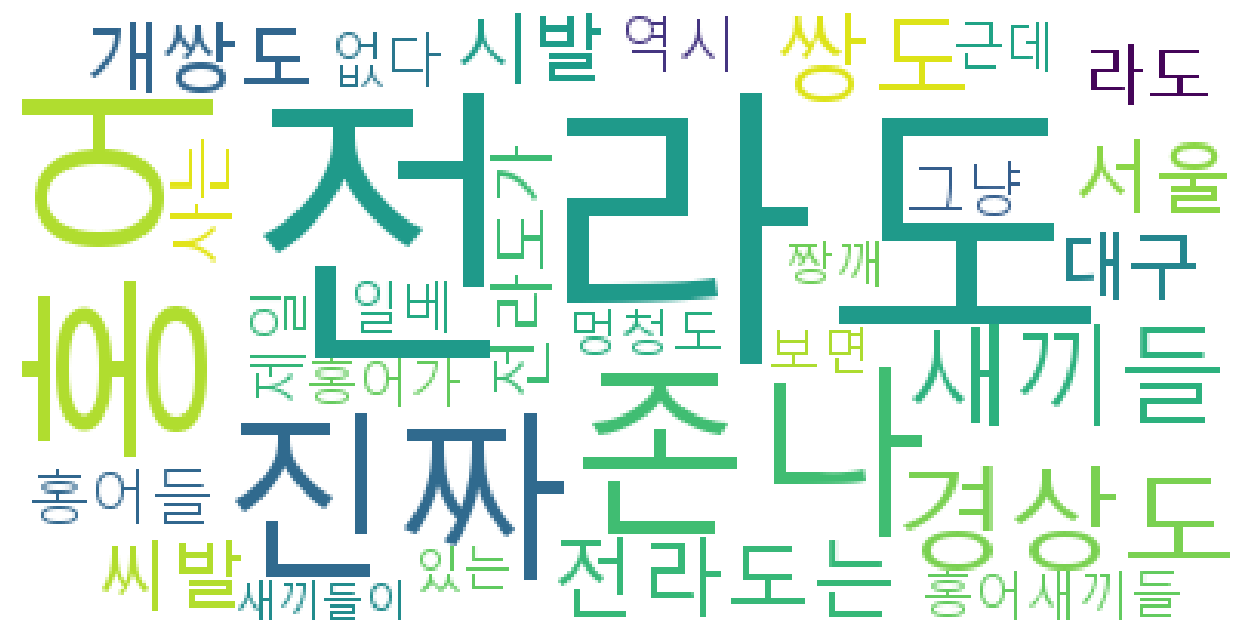

In [363]:
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

#### 불용어처리(stop word)
- 데이터셋 내에서 불필요한 단어토큰을 제거하는 작업

In [364]:
stop_words = [ '그냥','근데','있는','보면','제일','진짜']
# 1. 원문에서 제거
stop_clean_words = [] # 불용어가 제거된 리스트
for w in clean_words:
    if w not in stop_words: # 단어토큰이 불용어 목록에 포함되지 않는 경우
        stop_clean_words.append(w)

In [365]:
# 2. 카운팅된 결과에서 제거
words_most_30_dict = dict(words_most_30)
for sw in stop_words :
    del words_most_30_dict[sw]
words_most_30_dict

{'전라도': 142,
 '홍어': 54,
 '존나': 42,
 '경상도': 39,
 '새끼들': 34,
 '쌍도': 28,
 '전라도는': 27,
 '서울': 23,
 '개쌍도': 22,
 '시발': 20,
 '씨발': 20,
 '대구': 18,
 '라도': 15,
 '전라도가': 15,
 '사는': 15,
 '역시': 14,
 '홍어들': 14,
 '없다': 13,
 '일베': 12,
 '홍어새끼들': 12,
 '멍청도': 12,
 '홍어가': 12,
 '짱깨': 11,
 '새끼들이': 11}

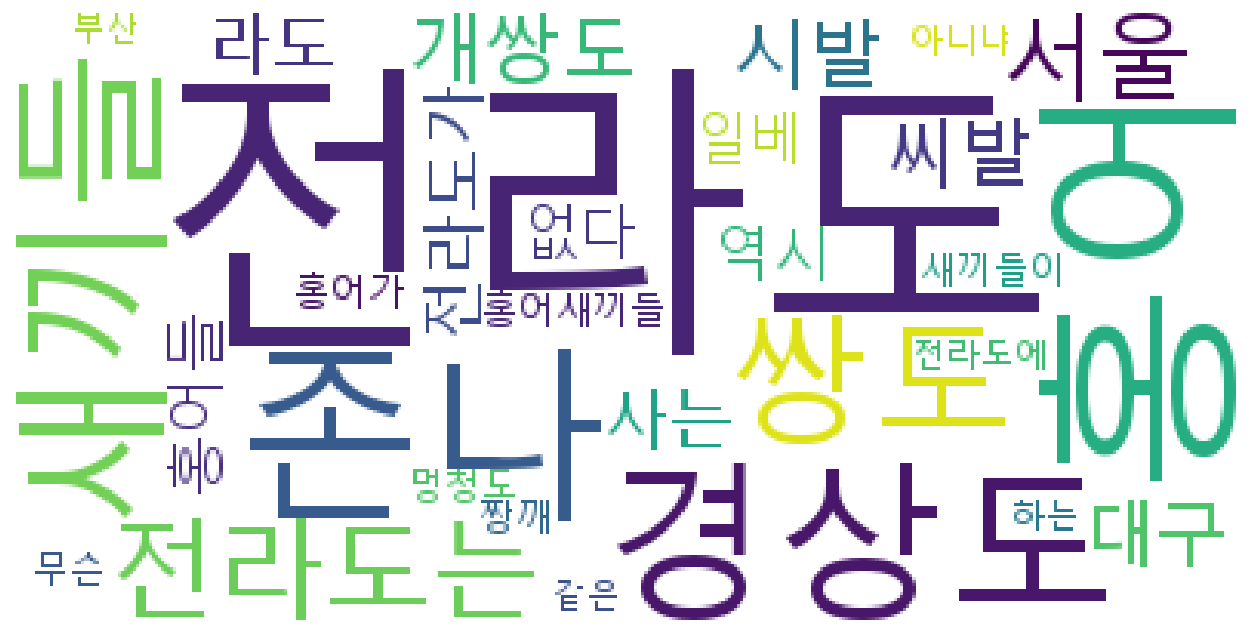

In [366]:
# 불용어 처리된 단어 토큰 빈도세기
counter = Counter(stop_clean_words)
words_most_30 = counter.most_common(30)
# 워드클라우드 그리기
wc_rs = wc.generate_from_frequencies(dict(words_most_30))
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

##### Kiwi 활용하기
- 형태소 분석, 불용어 처리, 기타 다양한 기능을 지원
- https://github.com/bab2min/kiwipiepy

In [367]:
# !pip install Kiwipiepy

#### 띄어쓰기 교정

In [368]:
from kiwipiepy import Kiwi
Kiwi = Kiwi() # 객체생성

In [369]:
# 띄어쓰기 교정
Kiwi.space("띄어쓰기없이작성된텍스트네이걸교정해")

'띄어쓰기 없이 작성된 텍스트네 이걸 교정해'

#### Kiwi를 이용한 불용어 처리

In [370]:
from kiwipiepy.utils import Stopwords
stopwords = Stopwords() # 불용어 객체생성 -> 기본적인 한국어 불용어가 탑재

In [371]:
Kiwi.tokenize("분석 결과에서 불용어만 제외하고 출력할 수도 있다.", stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='결과', tag='NNG', start=3, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

In [372]:
# 불용어 추가
stopwords.add(("결과",'NNG')) # 새로운 불용어 등록

In [373]:
Kiwi.tokenize('분석 결과에서 불용어만 제외하고 출력할 수도 있다.', stopwords=stopwords)

[Token(form='분석', tag='NNG', start=0, len=2),
 Token(form='불', tag='NNG', start=8, len=1),
 Token(form='용어', tag='NNG', start=9, len=2),
 Token(form='제외', tag='NNG', start=13, len=2),
 Token(form='출력', tag='NNG', start=18, len=2),
 Token(form='있', tag='VA', start=25, len=1)]

### 이모지제거

In [374]:
# 이모지 패키지 설치
# !pip install emoji

In [375]:
import emoji

In [376]:
emoji.replace_emoji("오늘 점심으로 짜장밥을 먹었는데 너무 맛있었어.💕")

'오늘 점심으로 짜장밥을 먹었는데 너무 맛있었어.'

In [377]:
emoji.demojize('오늘 점심으로 짜장밥을 먹었는데 너무 맜있었어.💕💕')

'오늘 점심으로 짜장밥을 먹었는데 너무 맜있었어.:two_hearts::two_hearts:'

#### 형태소 분석
- 의미를 가지는 가장 작은 크기의 문장단위를 형태소라고 한다.
- 형태소 단위로 분리하고 품사를 부착하는 작업을 품사태깅이라고 한다.

In [378]:
morphs_list = [] # 형태소로 분리된 단어토큰이 들어갈 리스트
for w in tqdm(clean_words ):
    morphs_rs = Kiwi.tokenize(w, stopwords=stopwords) # 형태소 분리 및 불용어 처리
    morphs_list = morphs_list + morphs_rs

100%|██████████| 7621/7621 [00:00<00:00, 9270.21it/s] 


In [379]:
len(morphs_list)

11461

In [380]:
morphs_list

[Token(form='예수', tag='NNP', start=0, len=2),
 Token(form='십', tag='NR', start=0, len=1),
 Token(form='새끼', tag='NNG', start=1, len=2),
 Token(form='개새끼', tag='IC', start=0, len=3),
 Token(form='창녀', tag='NNG', start=0, len=2),
 Token(form='아들', tag='NNG', start=2, len=2),
 Token(form='애비', tag='NNG', start=0, len=2),
 Token(form='실종', tag='NNG', start=2, len=2),
 Token(form='가정', tag='NNG', start=0, len=2),
 Token(form='교육', tag='NNG', start=2, len=2),
 Token(form='못', tag='MAG', start=0, len=1),
 Token(form='받', tag='VV-R', start=1, len=1),
 Token(form='무뇌충', tag='NNG', start=0, len=3),
 Token(form='허어', tag='IC', start=0, len=2),
 Token(form='증', tag='NNG', start=2, len=1),
 Token(form='정신병자', tag='NNG', start=0, len=4),
 Token(form='사기', tag='NNG', start=0, len=2),
 Token(form='꾼', tag='XSN', start=2, len=1),
 Token(form='망상', tag='NNG', start=0, len=2),
 Token(form='근본', tag='NNG', start=0, len=2),
 Token(form='병신', tag='NNG', start=0, len=2),
 Token(form='장애인', tag='NNG', start=0

#### 특정품사 필터링하기
- https://github.com/bab2min/Kiwi?tab=readme-ov-file#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8

In [381]:
# 일반명사(NNG), 동사(VV), 형용사(VA)를 필터링 해보자
morphs_filtering_list = []
for m in morphs_list :
    if m.tag in ['NNG','VV','VA'] : 
        morphs_filtering_list.append(m.form)

In [382]:
len(morphs_filtering_list)

6087

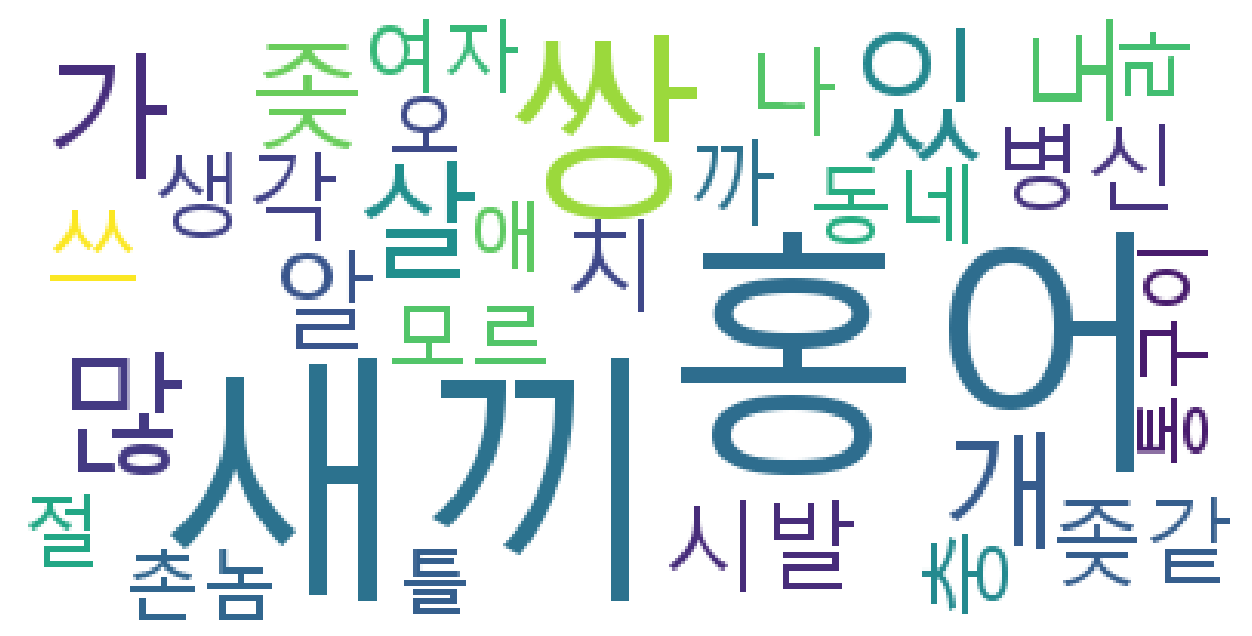

In [383]:
# 불용어 처리된 단어 토큰 빈도세기
counter = Counter(morphs_filtering_list)
words_most_30 = counter.most_common(30)
# 워드클라우드 그리기
wc_rs = wc.generate_from_frequencies(dict(words_most_30))
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기

#### 워드클라우드 실습
- https://github.com/bab2min/corpus/tree/master/sentiment
- 네이버 쇼핑 리뷰 데이터셋
- 긍정 / 부정 라벨링이 되어있는 데이터셋
- 분석방법 선택
    - 1. 전체데이터 워드클라우드 실시
    - 2. 긍정 또는 부정 리뷰만 골라서 워드클라우드 실시
    - 3. 특정 주제, 키워드가 포함된 리뷰만 모아서 워드클라우드 실시

In [384]:
# 훈련용, 평가용 데이터 로딩
train = pd.read_table("./data/naver_shopping.txt", # 파일경로
                    delimiter="\t") # 구분자
test = pd.read_table("./data/naver_shopping.txt", # 파일경로
                    delimiter='\t') # 구분자

In [387]:
test

,5,배공빠르고 굿
0,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
...,...,...
199994,2,장마라그런가!!! 달지않아요
199995,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997,5,넘이쁘고 쎄련되보이네요~


In [ ]:
# 결측치
display(train.info())
display(test.info())

In [388]:
text_train = train['배공빠르고 굿']
text_train

0                             택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1         아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2         선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3                         민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4         비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
                                ...                        
199994                                      장마라그런가!!! 달지않아요
199995    다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996                      로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997                                        넘이쁘고 쎄련되보이네요~
199998     아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다
Name: 배공빠르고 굿, Length: 199999, dtype: object

In [390]:
# 쪼개진 단어들이 들어갈 리스트
words = []
for text in tqdm(text_train) :
    temp = word_tokenize(text) # 한 문장씩 토큰화
    words = words+temp

100%|██████████| 199999/199999 [35:08<00:00, 94.84it/s] 


In [391]:
counter = Counter(words) # 같은 단어의 갯수를 세준다
words_most_100 = counter.most_common(100)
words_most_100

[('.', 72602),
 ('!', 26404),
 ('..', 25021),
 ('너무', 22220),
 ('잘', 17987),
 ('...', 15237),
 ('좋아요', 14719),
 ('재구매', 13832),
 (',', 12358),
 ('그냥', 9962),
 ('?', 8624),
 ('좀', 8469),
 ('다', 7143),
 ('많이', 6636),
 ('더', 6551),
 ('생각보다', 6199),
 (';', 5447),
 ('배송도', 5333),
 ('같아요', 5125),
 ('배송', 4927),
 ('정말', 4714),
 ('ㅠㅠ', 4287),
 ('좋네요', 4277),
 ('빠르고', 3964),
 ('좋습니다', 3788),
 ('진짜', 3763),
 ('샀는데', 3739),
 ('배송이', 3712),
 ('아주', 3659),
 ('만족합니다', 3481),
 ('....', 3461),
 ('또', 3389),
 ('넘', 3318),
 ('조금', 3121),
 ('딱', 3040),
 ('것', 2931),
 ('ㅎㅎ', 2885),
 ('완전', 2867),
 ('아직', 2862),
 ('좋고', 2798),
 ('엄청', 2739),
 ('감사합니다', 2714),
 ('ㅠ', 2670),
 ('다시', 2502),
 ('다른', 2496),
 ('있어요', 2394),
 ('제품', 2361),
 ('가격대비', 2331),
 ('안', 2298),
 ('구매했는데', 2280),
 ('주문했는데', 2216),
 ('있어서', 2130),
 ('제가', 2111),
 ('맘에', 2096),
 ('계속', 2085),
 ('했는데', 2079),
 ('바로', 2046),
 ('냄새가', 1996),
 ('배송은', 1989),
 ('않고', 1969),
 ('항상', 1922),
 ('그리고', 1916),
 ('합니다', 1900),
 ('수', 1873),
 ('마음에', 18

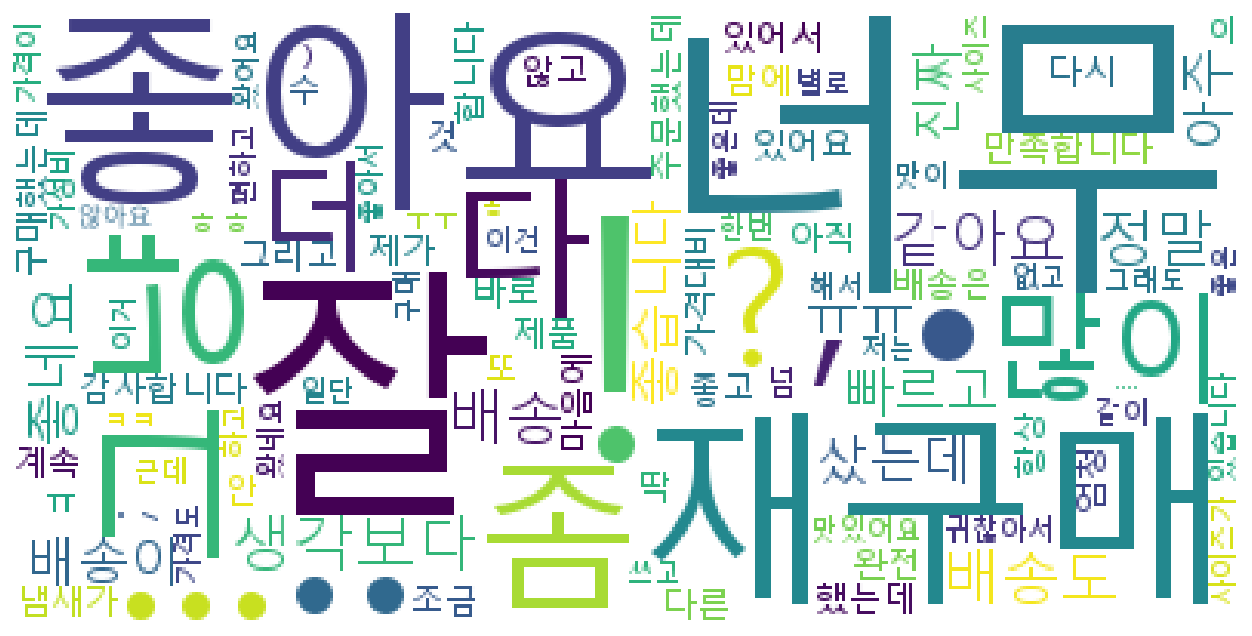

In [392]:
# 객체생성
wc = WordCloud(background_color='white', # 배경색 설정
                random_state=821, # 난수 seed 고정
                font_path = r'C:\Windows\Fonts\malgun.ttf')
# 단어빈도가 측정된 데이터로부터 워드클라우드 생성
# 입력데이터는 딕셔너리 형태로 집어 넣을것 (key:단어, value:빈도)
wc_rs = wc.generate_from_frequencies(dict(words_most_100))
plt.rc('font',family='Malgun Gothic')
plt.figure(figsize=(20,8)) # 가로, 세로 비율 지정(인치 단위)
plt.imshow(wc_rs) # 그림을 시각화할때 사용하는 함수
plt.axis('off') # x,y 눈금 숨기기
plt.show() # 시각화 결과 보여주기